In [1]:
# from t2e_utils import t2e, weibull_loglik_continuous, activate, weibull_mode

from t2e_utils import *
import pandas as pd
import pickle
import warnings
warnings.filterwarnings("ignore")
import os
%load_ext autoreload
%autoreload 2


path = 'data/'

a = os.path.join(path,'helpdesk.csv')
a = pd.read_csv(a)
b = os.path.join(path,'bpi_12_w.csv')
b = pd.read_csv(b)
c = os.path.join(path,'bpi_12_w_no_repeat.csv')
c = pd.read_csv(c)
d = os.path.join(path,'env_permit.csv')
d = pd.read_csv(d)

df_name = {
    'a':'helpdesk',
    'b':'bpi_12_w',
    'c':'bpi_12_w_no_repeat',
    'd':'env_permit'
}

df_dict = {
    'a': a,
    'b': b,
    'c': c,
    'd': d
}
range_dict = {
    'a': range(2,8,1),
    'b': range(2,22,2),
    'c': range(2,12,2),
    'd': range(2,22,2)
}

Using TensorFlow backend.


[]

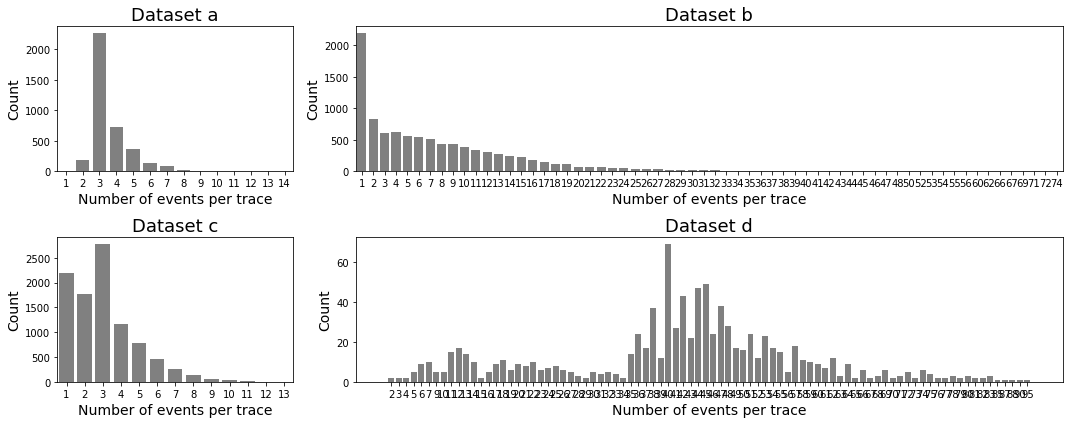

In [141]:
from matplotlib import gridspec
fig = plt.figure(figsize=(15, 6)) 
gs = gridspec.GridSpec(2, 2, width_ratios=[1,3])

i = 0
for key, dataset in df_dict.items():

    ax = plt.subplot(gs[i])
    sns.countplot(dataset.groupby(["CaseID"]).agg({"ActivityID":'count'})["ActivityID"], color='gray', ax = ax)
    plt.xlabel("Number of events per trace", fontsize=14)
    plt.ylabel("Count",fontsize=14)
    plt.title("Dataset " + key,fontsize=18)
    i+=1
plt.tight_layout()
plt.plot()

[]

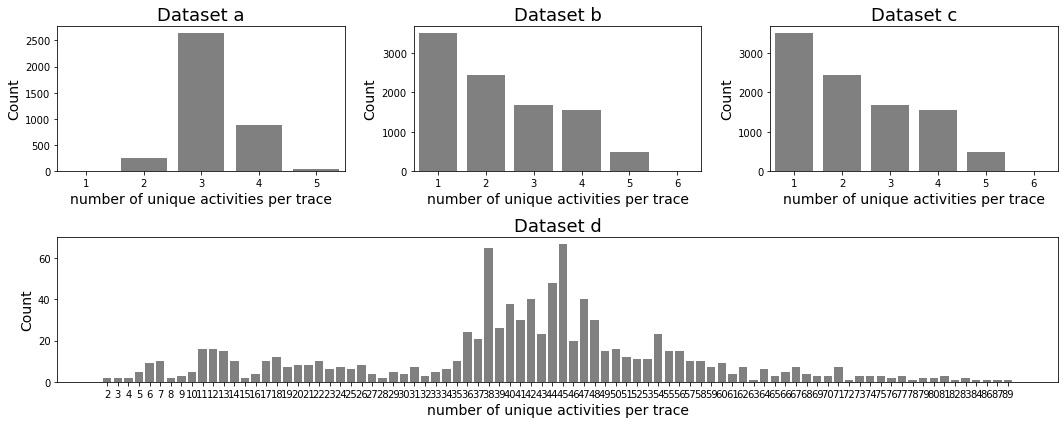

In [37]:
from matplotlib import gridspec
fig = plt.figure(figsize=(15, 6)) 
gs = gridspec.GridSpec(2, 3, width_ratios=[1,1,1])

i = 0
for key, dataset in df_dict.items():

    ax = plt.subplot(gs[i])
    if i == 3:
        ax = plt.subplot(gs[i:])
    sns.countplot(dataset.groupby(["CaseID"]).agg({"ActivityID":'nunique'})["ActivityID"], color='gray', ax = ax)
    plt.xlabel("number of unique activities per trace", fontsize=14)
    plt.ylabel("Count",fontsize=14)
    plt.title("Dataset " + key,fontsize=18)
    i+=1
plt.tight_layout()
plt.plot()

In [114]:
# # save common datasets
# path = '../Tax_paper/data/'

# for dataset in ['d']:
#     t2e_obj = t2e(df_dict[dataset], 
#                   prefix = 2, 
#                   resolution = 's', 
#                   censored = True, 
#                   cen_prc = 0.4)
#     dataset_preprocessed = t2e_obj.preprocess()
#     observed_cases = set(t2e_obj.all_cases) - set(t2e_obj.censored_cases)
#     to_save = df_dict[dataset].loc[df_dict[dataset]['CaseID'].isin(observed_cases)].reset_index(drop=True)

[autoreload of t2e_utils failed: Traceback (most recent call last):
  File "C:\Users\ebasfad\AppData\Local\Continuum\anaconda3\envs\t2e\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\ebasfad\AppData\Local\Continuum\anaconda3\envs\t2e\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\ebasfad\AppData\Local\Continuum\anaconda3\envs\t2e\lib\imp.py", line 315, in reload
    return importlib.reload(module)
  File "C:\Users\ebasfad\AppData\Local\Continuum\anaconda3\envs\t2e\lib\importlib\__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  Fi

In [119]:
from t2e_utils import *
import pandas as pd
import pickle
import warnings
warnings.filterwarnings("ignore")
import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
dataset='b'
res='s'
censored=False
cen_per=0
fit_type:'t2e'
df_results = dict()
prefix = 6
transform = True

print("\ndataset:", dataset, "\tprefix:", prefix)

t2e_obj = t2e(df_dict[dataset], 
              prefix = prefix, 
              resolution = res, 
              censored = censored , 
              cen_prc = cen_per,
              transform = transform
             )
dataset_preprocessed = t2e_obj.preprocess()
X_train, X_test, X_val, y_train, y_test, y_val, len_train, len_val, len_test = t2e_obj.smart_split(train_prc = 0.7,
                                                                                                     val_prc = 0.45,
                                                                                                      scaling=True)


dataset: b 	prefix: 6
all cases 4308
first 10 censored cases []
	Total Observed: 4308
	Training data Observed: 1659
	Training data Censored: 0
	Training data to use: 1659
	Validation data: 1356
	Testing data   : 1293


In [32]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((1659, 6, 8), (1293, 6, 8), (1356, 6, 8), (1659, 2), (1293, 2), (1356, 2))

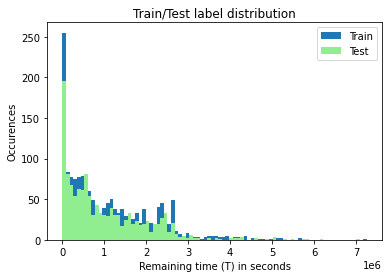

In [33]:
if res == 'd':
    bins = np.arange(0,y_train.max()+1, 1)
elif res == 'h':
    bins = np.arange(0,y_train.max()+24, 24)
elif res == 's':
    bins = np.arange(0,y_train.max()+86400, 86400)
    
plt.figure(figsize=(6,4))
plt.hist(y_train[:,0], bins = bins,label="Train");
# plt.hist(y_val[:,0], bins = bins,label="Val");
plt.hist(y_test[:,0], bins = bins, label="Test", color='lightgreen');
plt.xlabel('Remaining time (T) in seconds')
plt.ylabel('Occurences')
plt.title('Train/Test label distribution')
plt.legend()
plt.show()

0.3333333333333333 3.0


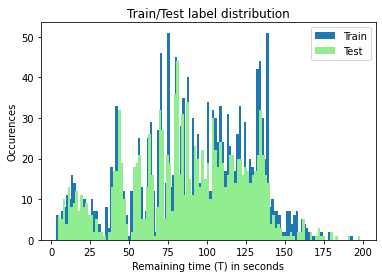

In [35]:
root = 3
root = 1/root
power = 1/root
print(root, power)

plt.figure(figsize=(6,4))
y_conv = (y_train[:,0]**root)

plt.hist(y_conv, bins = 120,label="Train", alpha =1);

y_conv = (y_test[:,0]**root)
# y_conv = (np.log(y_test[:,0]))
plt.hist(y_conv, bins = 120,label="Test", alpha=1, color='lightgreen');

plt.xlabel('Remaining time (T) in seconds')
plt.ylabel('Occurences')
plt.title('Train/Test label distribution')
plt.legend()
plt.show()

In [134]:
print("Layer size:",4, end = " ..... ")
t2e_obj.fit(X_train, y_train, X_val, y_val,size=8, vb = True)
print("Done")
print("Training accomplished in", t2e_obj.fit_time, "seconds")
try:
    test_result_df, mae, accuracy = t2e_obj.evaluate(X_test,y_test)
    print('power:', t2e_obj.power)
    print(len(test_result_df['T_pred'].unique()), 'unique predictions')
    print(np.round(mae,3), 'mae')
except:
    print('evaluation failed')


Layer size: 4 ..... Y_label has been transformed


Epoch 1/500
3/4 [=====================>........] - ETA: 0s - loss: 1.8208
Epoch 00001: val_loss improved from inf to 3.27807, saving model to testing_output/best_model.h5
4/4 [==============================] - 0s 106ms/step - loss: 1.8757 - val_loss: 3.2781
Epoch 2/500
3/4 [=====================>........] - ETA: 0s - loss: 1.6375
Epoch 00002: val_loss improved from 3.27807 to 3.22356, saving model to testing_output/best_model.h5
4/4 [==============================] - 0s 72ms/step - loss: 1.7267 - val_loss: 3.2236
Epoch 3/500
3/4 [=====================>........] - ETA: 0s - loss: 1.5209
Epoch 00003: val_loss improved from 3.22356 to 3.17396, saving model to testing_output/best_model.h5
4/4 [==============================] - 0s 83ms/step - loss: 1.5447 - val_loss: 3.1740
Epoch 4/500
3/4 [=====================>........] - ETA: 0s - loss: 1.4885
Epoch 00004: val_loss improved from 3.17396 to 3.12671, saving model to testing_output/best_mod

Epoch 33/500
3/4 [=====================>........] - ETA: 0s - loss: 1.0390
Epoch 00033: val_loss improved from 2.62195 to 2.60665, saving model to testing_output/best_model.h5
4/4 [==============================] - 0s 114ms/step - loss: 1.1130 - val_loss: 2.6066
Epoch 34/500
3/4 [=====================>........] - ETA: 0s - loss: 1.0363
Epoch 00034: val_loss improved from 2.60665 to 2.58456, saving model to testing_output/best_model.h5
4/4 [==============================] - 0s 94ms/step - loss: 1.1010 - val_loss: 2.5846
Epoch 35/500
3/4 [=====================>........] - ETA: 0s - loss: 1.0189
Epoch 00035: val_loss improved from 2.58456 to 2.57322, saving model to testing_output/best_model.h5
4/4 [==============================] - 0s 112ms/step - loss: 1.0897 - val_loss: 2.5732
Epoch 36/500
3/4 [=====================>........] - ETA: 0s - loss: 1.0182
Epoch 00036: val_loss improved from 2.57322 to 2.56910, saving model to testing_output/best_model.h5
4/4 [==============================]

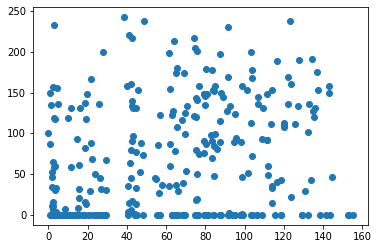

In [136]:
y_pred = t2e_obj.predict(X_train)
plt.scatter(
    x = y_train[:,0], 
    y = y_pred
)

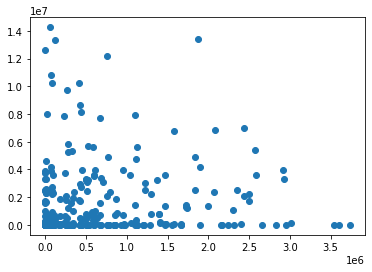

In [137]:
y_pred = t2e_obj.predict(X_train)
plt.scatter(
    x = y_train[:,0]**t2e_obj.power, 
    y = y_pred**t2e_obj.power
)

No handles with labels found to put in legend.


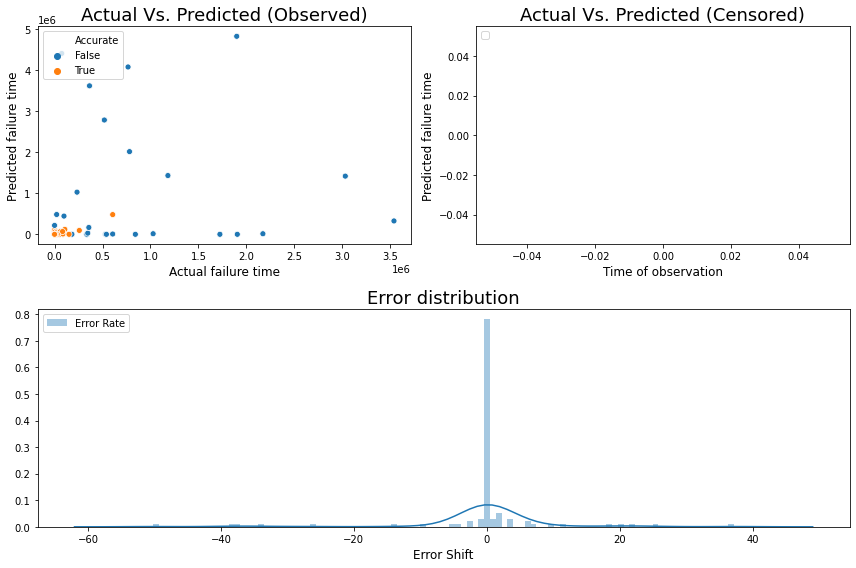

In [138]:
plot_predictions_insights(test_result_df)